In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\ML-main\LAB3\tennis.csv')
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder

In [5]:
enc = LabelEncoder()
df_num_cat = pd.DataFrame()

df_num_cat['outlook'] = enc.fit_transform(df['outlook'])
df_num_cat['temp'] = enc.fit_transform(df['temp'])
df_num_cat['humidity'] = enc.fit_transform(df['humidity'])
df_num_cat['wind'] = enc.fit_transform(df['wind'])
df_num_cat['play'] = enc.fit_transform(df['play'])

df_num_cat

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [7]:
X = df_num_cat.drop(['play'],axis=1)
y = df_num_cat['play']
print(X)
print(y)

    outlook  temp  humidity  wind
0         2     1         0     1
1         2     1         0     0
2         0     1         0     1
3         1     2         0     1
4         1     0         1     1
5         1     0         1     0
6         0     0         1     0
7         2     2         0     1
8         2     0         1     1
9         1     2         1     1
10        2     2         1     0
11        0     2         0     0
12        0     1         1     1
13        1     2         0     0
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32


In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [9]:
dt_clf.score(X,y)

1.0

In [11]:
y_pred = dt_clf.predict(X)
print(y)
print(y_pred)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

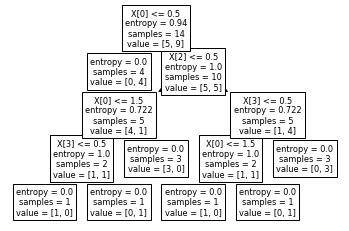

In [12]:
from sklearn import tree
tree.plot_tree(dt_clf)

In [14]:
import sklearn.metrics

lbs = [0,1]

CF = sklearn.metrics.confusion_matrix(y, y_pred,labels=lbs)
acc = sklearn.metrics.accuracy_score(y, y_pred)
p = sklearn.metrics.precision_score(y, y_pred, labels=lbs, pos_label=0)
r = sklearn.metrics.recall_score(y, y_pred, labels=lbs,pos_label=0)
f1 = sklearn.metrics.f1_score(y, y_pred, labels=lbs,pos_label=0)

print("Confusion Matrix: \n",CF)
print("Accuracy: \n",acc)
print("Precision Score: \n",p)
print("Recall Score: \n",r)
print("F1 Score: \n",f1)

Confusion Matrix: 
 [[5 0]
 [0 9]]
Accuracy: 
 1.0
Precision Score: 
 1.0
Recall Score: 
 1.0
F1 Score: 
 1.0
